# 탐색적 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline  
%config InlineBackend.figure_format = 'retina'

- 구글 코랩에서는 아래의 드라이브 마운트 실행

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
!curl -L https://bit.ly/33aJCVy -o w5_PM_train.csv
# !curl -L https://bit.ly/39N0hzR -o w5_PM_test.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   144  100   144    0     0    388      0 --:--:-- --:--:-- --:--:--   388
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 14.7M  100 14.7M    0     0  3572k      0  0:00:04  0:00:04 --:--:-- 5828k


In [10]:
df_train = pd.read_csv('w5_PM_train.csv')
df_train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187,0,0


In [11]:
featurs = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

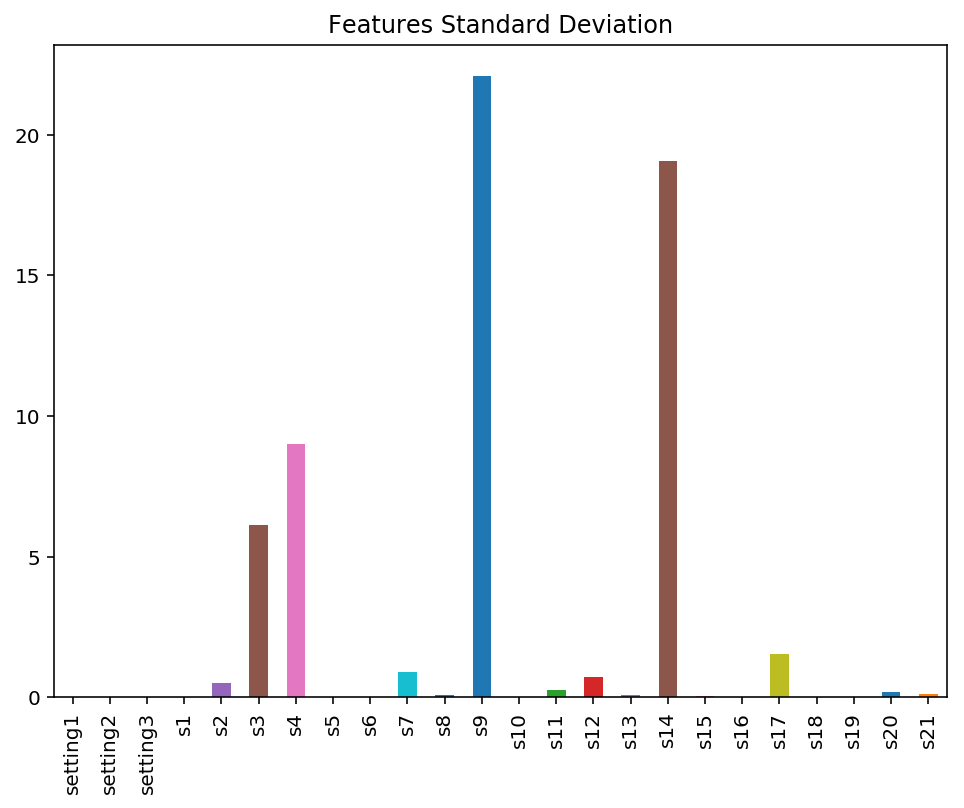

In [12]:
# 해당 특성들의 표준 편차
df_train[featurs].std().plot(kind='bar', 
    figsize=(8,6), title="Features Standard Deviation")

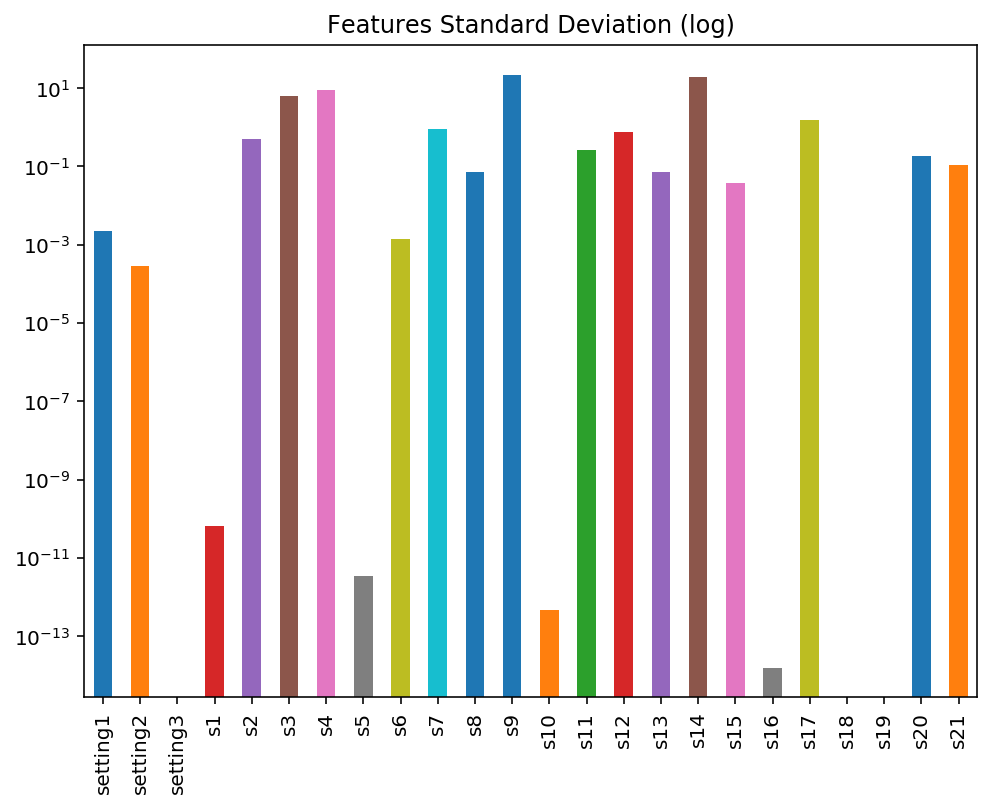

In [13]:
# 표준편차의 로그값을 보기
df_train[featurs].std().plot(kind='bar', 
  figsize=(8,6), logy=True,title="Features Standard Deviation (log)")

In [6]:
# ttf와의 상관관계가 큰 순으로 소팅
df_train[featurs].corrwith(df_train.ttf).sort_values(ascending=False)

s12         6.719831e-01
s7          6.572227e-01
s21         6.356620e-01
s20         6.294285e-01
s16        -6.041754e-16
s5         -6.041754e-16
setting2   -1.947628e-03
setting1   -3.198458e-03
s6         -1.283484e-01
s14        -3.067689e-01
s9         -3.901016e-01
s13        -5.625688e-01
s8         -5.639684e-01
s3         -5.845204e-01
s17        -6.061536e-01
s2         -6.064840e-01
s15        -6.426670e-01
s4         -6.789482e-01
s11        -6.962281e-01
setting3             NaN
s1                   NaN
s10                  NaN
s18                  NaN
s19                  NaN
dtype: float64

In [8]:
# ttf와의 상관관계가 큰 특성 리스트
corr_big_featurs = ['s12', 's7', 's21', 's20', 's6', 's14', 
    's9', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11']

## 상관관계 히트맵

In [9]:
corr_big_featurs = corr_big_featurs +  ['ttf']

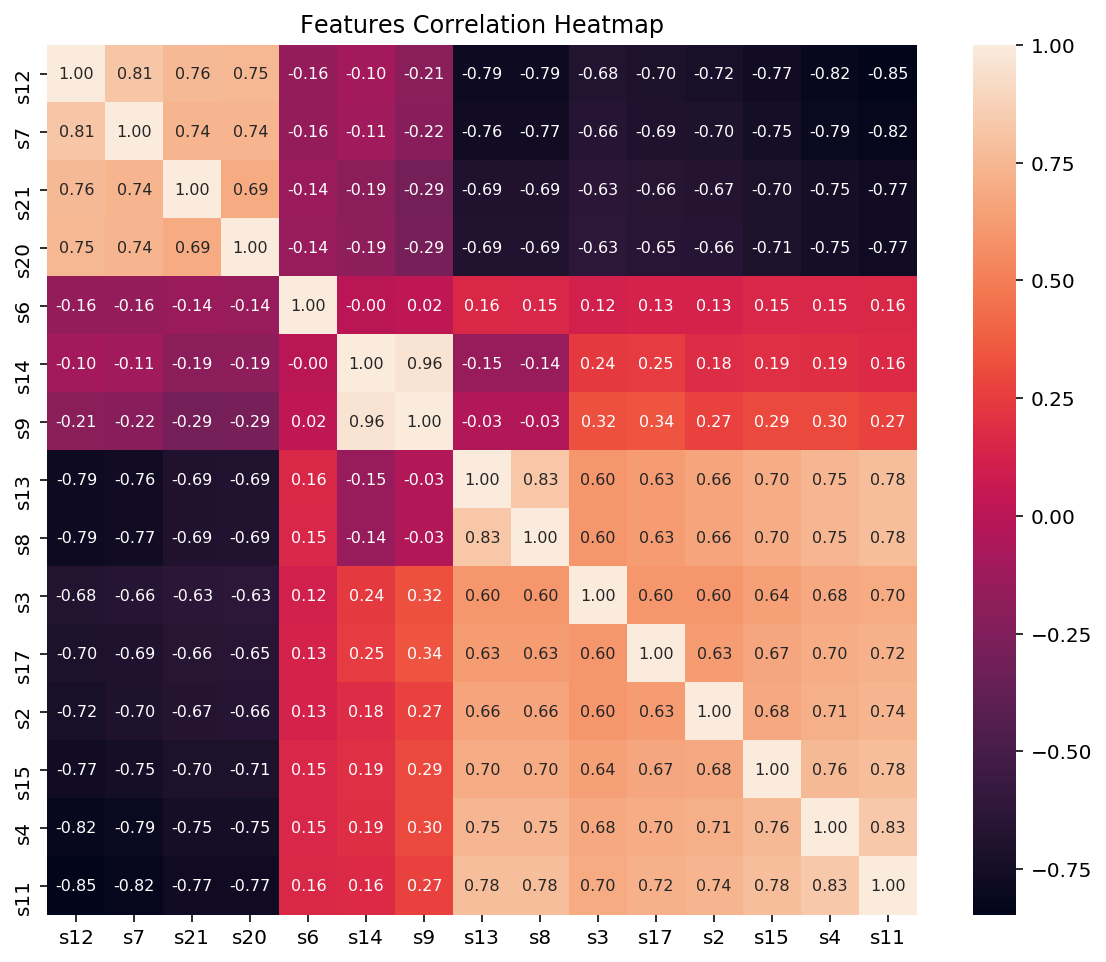

In [9]:
import seaborn as sns
cm = np.corrcoef(df_train[corr_big_featurs].values.T)
# sns.set(font_scale=1.0)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
  annot_kws={'size': 8}, yticklabels=corr_big_featurs, 
                 xticklabels=corr_big_featurs)
plt.title('Features Correlation Heatmap')
plt.show()

- 높은 상관관계를 갖는 특성들(> 0.8): (s14, s9), (s11, s4), (s11, s7), (s11, s12), (s4, s12), (s8,s13),  (s7, s12)  
- 이들은 향후 특성 선택에서 제거 대상이 될 수 있다.

- 여러(N) 특성의 분포를 파악하는 함수 정의

In [10]:
def explore_col(s, N): 
    fig = plt.figure(figsize=(10, 8))
    sub1 = fig.add_subplot(221) 
    sub1.set_title(s +' histogram') 
    sub1.hist(df_train[s])

    sub2 = fig.add_subplot(222)
    sub2.set_title(s +' boxplot')
    sub2.boxplot(df_train[s])
    
    select_engines = np.random.choice(range(1,101), N, replace=False)
        
    sub3 = fig.add_subplot(223)
    sub3.set_title('time series: ' + s +' / cycle')
    sub3.set_xlabel('cycle')
    for i in select_engines:
        df = df_train[['cycle', s]][df_train.id == i]
        sub3.plot(df['cycle'],df[s])
    
    sub4 = fig.add_subplot(224)
    sub4.set_title("scatter: "+ s + " / ttf (regr label)")
    sub4.set_xlabel('ttf')
    sub4.scatter(df_train['ttf'],df_train[s], s=2)
    plt.show()

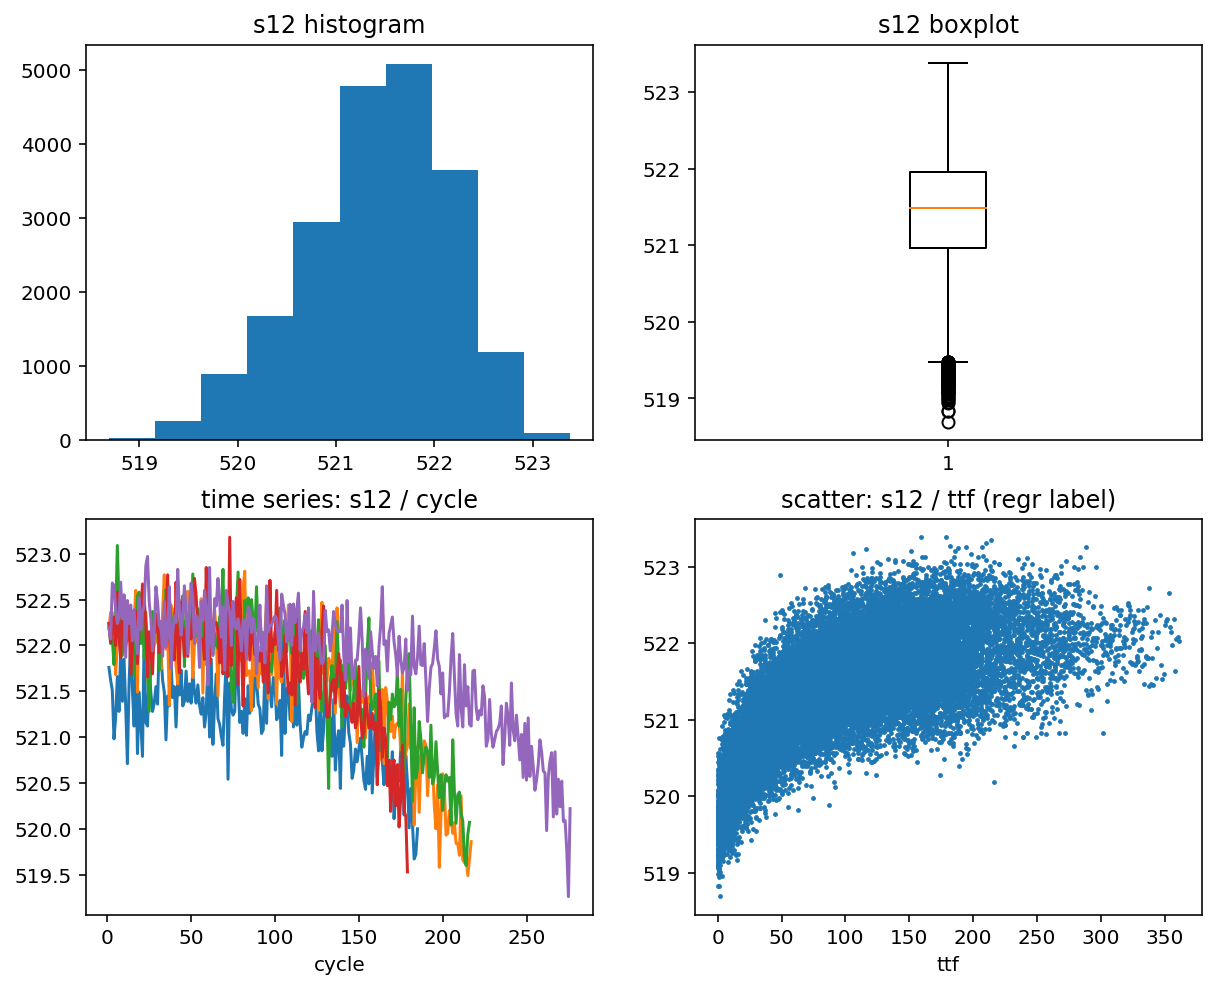

In [11]:
explore_col("s12", 5)

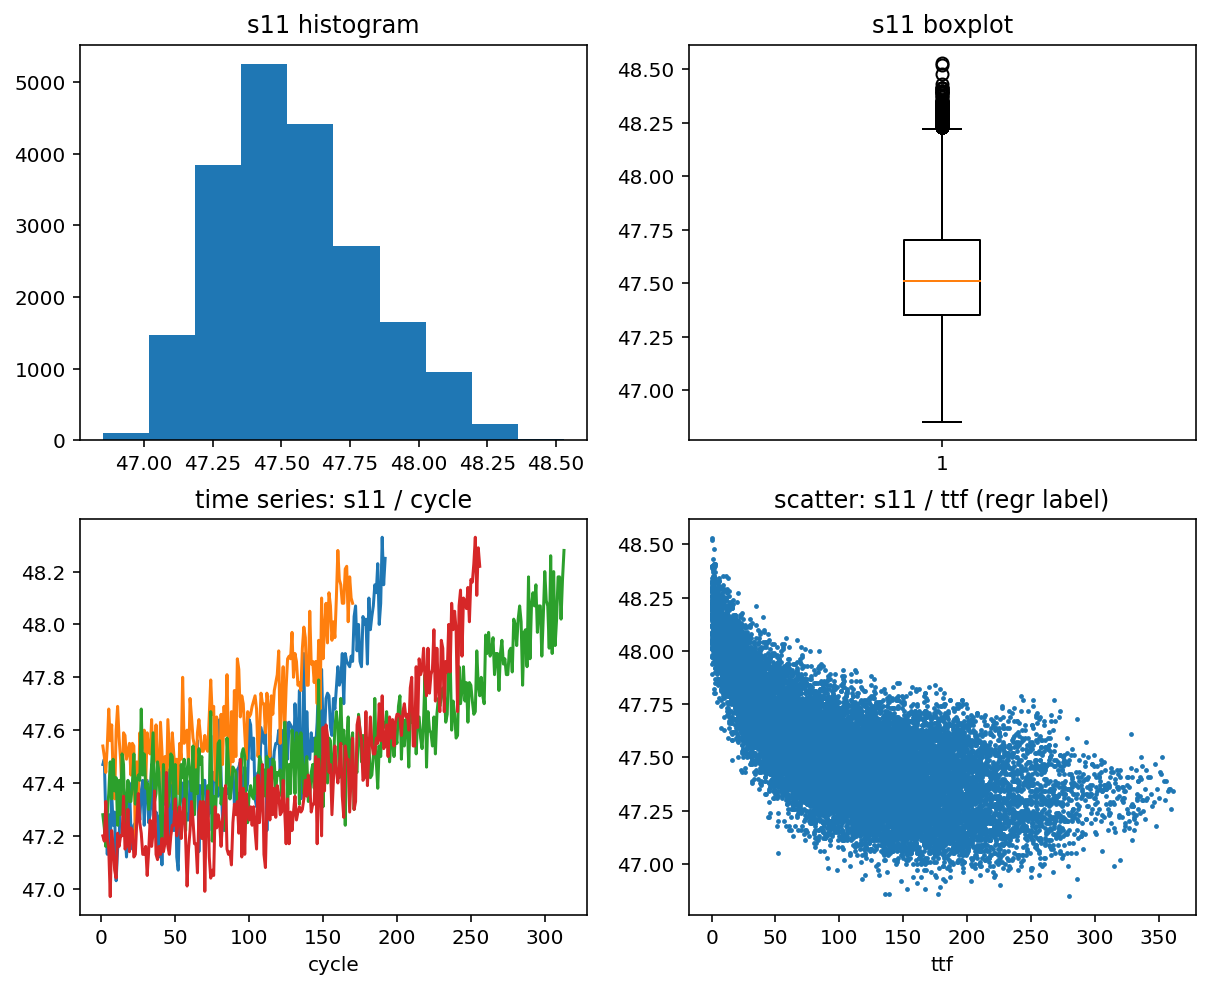

In [12]:
explore_col("s11", 4)

In [13]:
def plot_time_series(s, N):    
    fig, axes = plt.subplots(N, 1, sharex=True, figsize = (15, 15))
    fig.suptitle(s + ' time series / cycle', fontsize=15)
    
    select_engines = np.random.choice(range(1,101), N, replace=False).tolist()
    
    for e_id in select_engines:
        df = df_train[['cycle', s]][df_train.id == e_id]
        i = select_engines.index(e_id)
        axes[i].plot(df['cycle'],df[s])
        axes[i].set_ylabel('engine ' + str(e_id))
        axes[i].set_xlabel('cycle')
        #axes[i].set_title('engine ' + str(e_id), loc='right')

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

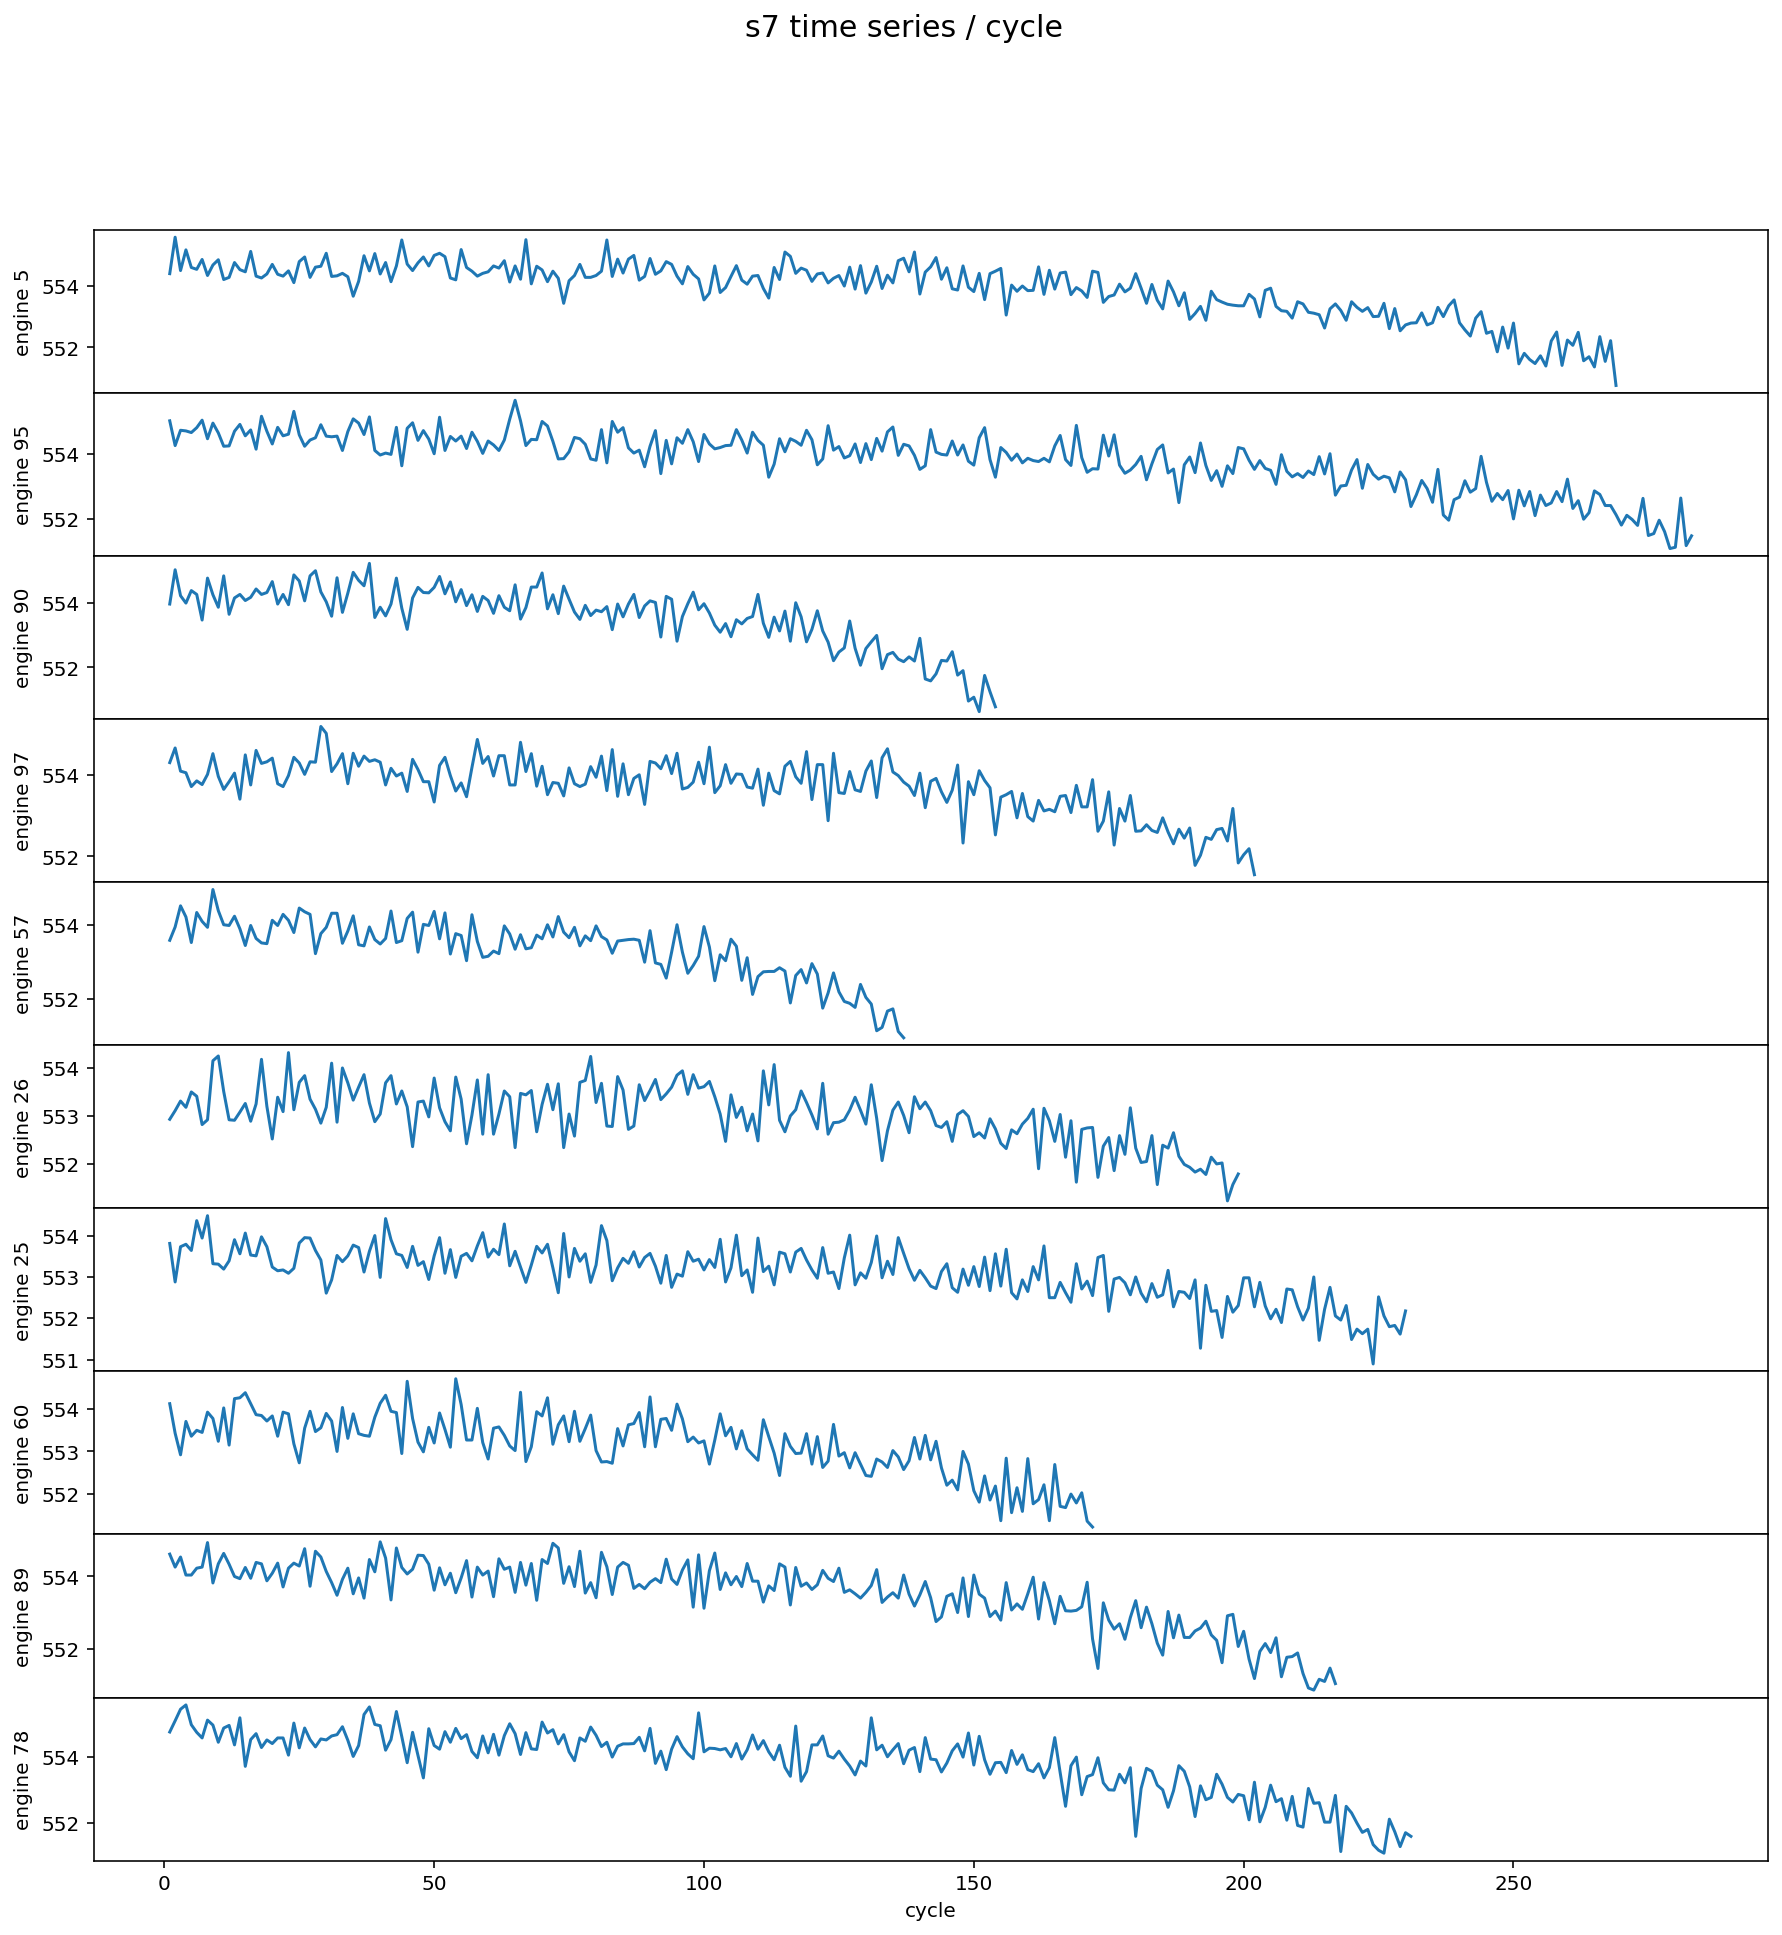

In [15]:
plot_time_series('s7',10)

### 분류 레이블 통계정보 보기

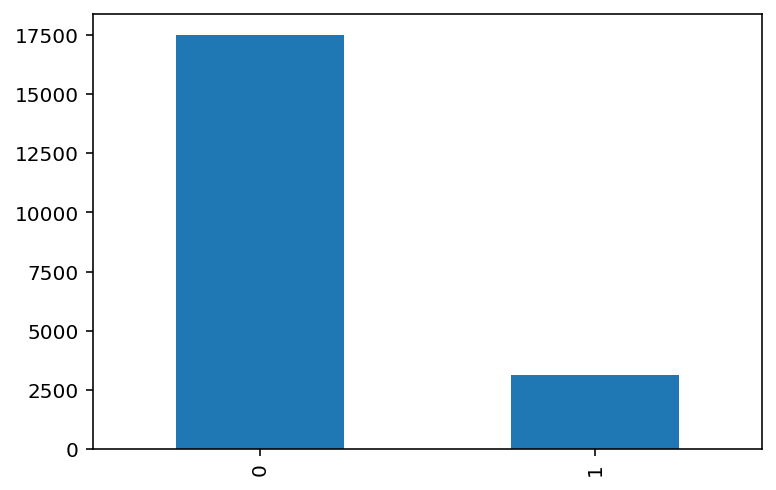

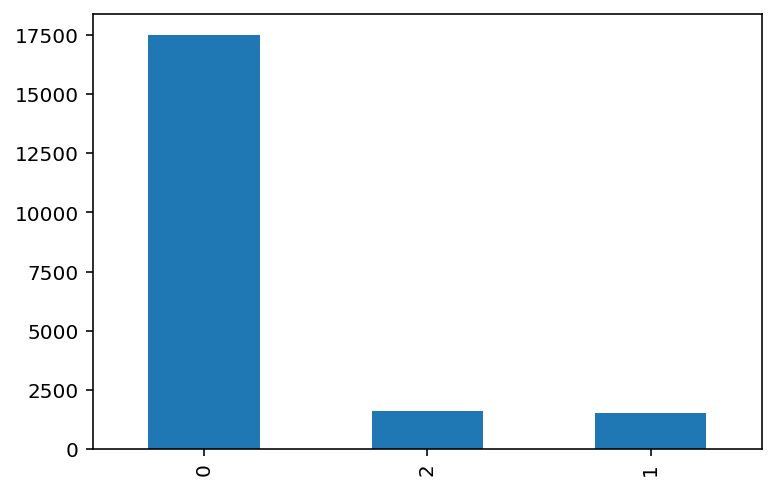

In [16]:
df_train['label_bnc'].value_counts().plot(kind='bar')
plt.show()
df_train['label_mcc'].value_counts().plot(kind='bar')